In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('./Datasets/HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
le = LabelEncoder()
data['dept'] = le.fit_transform(data['sales'])
data['salary_encoded'] = le.fit_transform(data['salary'])
print(data['dept'].unique())
print(data['salary_encoded'].unique())

[7 2 3 9 8 4 0 6 5 1]
[1 2 0]


In [12]:
features = data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','dept','salary_encoded']]
outcome = data['left']
xtrain, xtest, ytrain, ytest = train_test_split(features, outcome, test_size=0.3, random_state=325)

In [21]:
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=False,
                    learning_rate_init=0.01)

clf.fit(xtrain,ytrain)

testX = [[0.37,0.32,2,188,3,0,0,7,0]]  #Employee will leave

testpred=clf.predict(testX)
print("testpred is :", testpred)

if testpred == 0: 
  print("Employee will stay")
else:
  print("Employee will leave")


testpred is : [1]
Employee will leave


/home/presz/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


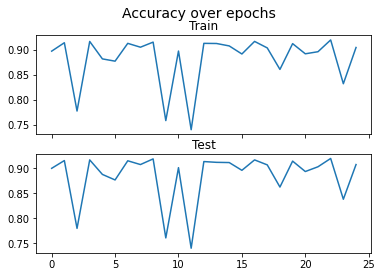

In [22]:
# clf = MLPClassifier(hidden_layer_sizes=(6,5),
#                     random_state=5,
#                     verbose=False,
#                     learning_rate_init=0.01)


N_TRAIN_SAMPLES = xtrain.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(ytrain)

scores_train = []
scores_test = []

epoch = 0
while epoch < N_EPOCHS:

    random_perm = np.random.permutation(xtrain.shape[0])
    mini_batch_index = 0

 
    while True:

        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]

        clf.partial_fit(xtrain.iloc[indices], ytrain.iloc[indices], classes=N_CLASSES)

        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    scores_train.append(clf.score(xtrain, ytrain))

    scores_test.append(clf.score(xtest, ytest))

    epoch += 1


fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

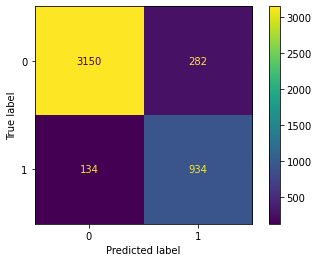

In [25]:
preds = clf.predict(xtest)
cm = confusion_matrix(ytest, preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

acc=0.9075555555555556,rec=0.8745318352059925, pre=0.7680921052631579, f1=0.817863397548161, auc=0.8961820015190801


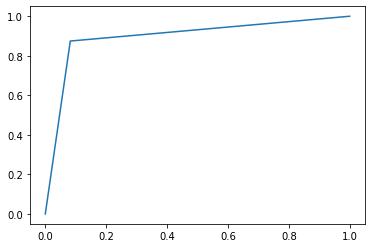

In [26]:
acc = accuracy_score(ytest,preds)
rec = recall_score(ytest, preds)
pre = precision_score(ytest, preds)
f1 = f1_score(ytest, preds)
auc = roc_auc_score(ytest, preds)
print(f"{acc=},{rec=}, {pre=}, {f1=}, {auc=}")
fprs,tprs,thresh = roc_curve(ytest, preds)
plt.plot(fprs, tprs)